In [100]:
data=spark.read.csv('./data/out.csv',header=True,inferSchema=True)
# from pyspark.sql.functions import monotonically_increasing_id 
# data = data.select("*").withColumn("ID", monotonically_increasing_id())

In [101]:
data.printSchema()

root
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- AIRLINE: string (nullable = true)
 |-- ORIGIN_AIRPORT: string (nullable = true)
 |-- DESTINATION_AIRPORT: string (nullable = true)
 |-- DEPARTURE_TIME: integer (nullable = true)
 |-- DEPARTURE_DELAY: integer (nullable = true)
 |-- SCHEDULED_TIME: integer (nullable = true)
 |-- ELAPSED_TIME: integer (nullable = true)
 |-- DISTANCE: integer (nullable = true)
 |-- SCHEDULED_ARRIVAL: integer (nullable = true)
 |-- ARRIVAL_TIME: integer (nullable = true)
 |-- ARRIVAL_DELAY: integer (nullable = true)
 |-- schedule_departure: integer (nullable = true)
 |-- NEW_DAY: integer (nullable = true)



In [102]:
# df=df.drop('TAXI_OUT','TAXI_IN', 'WHEELS_ON', 'WHEELS_OFF', 'YEAR', 
                       
#                        'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
#                        'WEATHER_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
#                        'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIR_TIME','AIR_SYSTEM_DELAY')
# # drop na value
# data=df.na.drop()

In [103]:
# df.printSchema()

In [80]:
# #convert departure time to the number of minutes in a day
# # from pyspark import SparkContext
# # from pyspark.sql import SparkSession
# from pyspark.sql.functions import udf
# from pyspark.sql.types import IntegerType
# def convert(time):
#     min=time%100
#     h=int(time/100)
#     return h*60+min

    
# time_converter=udf(lambda s:convert(s),IntegerType())
# data=data.select('*',time_converter(data['SCHEDULED_DEPARTURE'])\
#                  .alias('NEW_SCHEDULED_DEPARTURE'))\
# #                  .show()
# #                  .drop('SCHEDULED_DEPARTURE')

In [81]:
# from pyspark.sql.types import IntegerType
# from operator import add
# #combine day and month:
# months = [31,28,31,30,31,30,31,31,30,31,30,31]
# accu=0
# accu_months=[0]
# for element in months:
#     accu +=element
#     accu_months.append(accu)
# transform = udf(lambda month:accu_months[month-1],IntegerType())

# # data=data.select('*',(transform(data['MONTH'])+data['DAY']).alias('NEW_DAY'))
# data.withColumn('NEW_DAY',transform(data['MONTH'])+data['DAY'])

# # data=data.drop('MONTH')
# # data=data.drop('DAY')

In [105]:
# test_data=data.sample(False, 0.1,0)
# train_data=data.select('*').filter('ID'!=test_data['ID'])

train_data,test_data=data.randomSplit((0.8,0.2), 0)

In [106]:
# test_data.groupBy().avg("DEPARTURE_DELAY").show()
print(test_data.count())
print(train_data.count())
# test_data.sum('DEPARTURE_DELAY').show()

1142279
4571729


In [107]:
train_data.printSchema()

root
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- AIRLINE: string (nullable = true)
 |-- ORIGIN_AIRPORT: string (nullable = true)
 |-- DESTINATION_AIRPORT: string (nullable = true)
 |-- DEPARTURE_TIME: integer (nullable = true)
 |-- DEPARTURE_DELAY: integer (nullable = true)
 |-- SCHEDULED_TIME: integer (nullable = true)
 |-- ELAPSED_TIME: integer (nullable = true)
 |-- DISTANCE: integer (nullable = true)
 |-- SCHEDULED_ARRIVAL: integer (nullable = true)
 |-- ARRIVAL_TIME: integer (nullable = true)
 |-- ARRIVAL_DELAY: integer (nullable = true)
 |-- schedule_departure: integer (nullable = true)
 |-- NEW_DAY: integer (nullable = true)



In [1]:
test_data.write.csv('./data/test_flight.csv',header=True,mode='overwrite')
train_data.write.csv('./data/train_flight.csv',header=True,mode='overwrite')


NameError: name 'test_data' is not defined

## start to analyze 

In [1]:
data=spark.read.csv('./data/train_flight.csv',header=True,inferSchema=True)
data.printSchema()

root
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- AIRLINE: string (nullable = true)
 |-- ORIGIN_AIRPORT: string (nullable = true)
 |-- DESTINATION_AIRPORT: string (nullable = true)
 |-- DEPARTURE_TIME: integer (nullable = true)
 |-- DEPARTURE_DELAY: integer (nullable = true)
 |-- SCHEDULED_TIME: integer (nullable = true)
 |-- ELAPSED_TIME: integer (nullable = true)
 |-- DISTANCE: integer (nullable = true)
 |-- SCHEDULED_ARRIVAL: integer (nullable = true)
 |-- ARRIVAL_TIME: integer (nullable = true)
 |-- ARRIVAL_DELAY: integer (nullable = true)
 |-- schedule_departure: integer (nullable = true)
 |-- NEW_DAY: integer (nullable = true)



In [5]:
import matplotlib as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt







### Analysis: departure time and departure delay

In [ ]:
depTime_delay=data.select('schedule_departure','DEPARTURE_DELAY')

depTime_delay_sample=depTime_delay.sample(False, 0.1,0).toPandas()

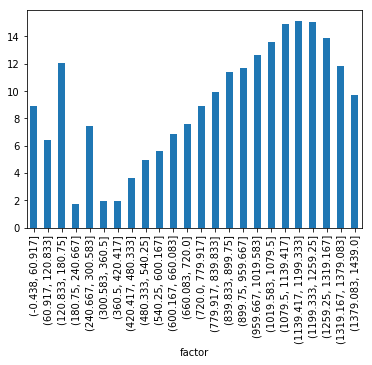

In [31]:
# factor = pd.cut(depTime_delay_sample['schedule_departure'], 24)
# pd.value_counts(factor)
depTime_delay_sample['factor']=pd.cut(depTime_delay_sample['schedule_departure'], 24)
depTime_delay_sample.groupby(['factor'])['DEPARTURE_DELAY'].mean().plot.bar()
plt.show()

## Analysis: day in week and departure delay

In [32]:
week_delay=data.select('DAY_OF_WEEK','DEPARTURE_DELAY')

week_delay_sample=week_delay.sample(False, 0.1,0).toPandas()


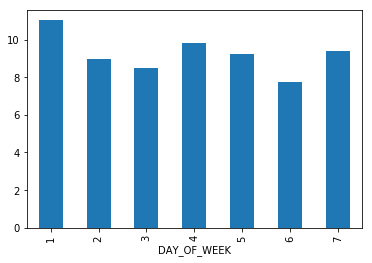

In [41]:
bins = [0, 5, 7]
# week_delay_sample['isWeekend']=pd.cut(week_delay_sample['DAY_OF_WEEK'], bins,labels=['N','Y'])
week_delay_sample.groupby(['DAY_OF_WEEK'])['DEPARTURE_DELAY'].mean().plot.bar()
plt.show()

## Analysis: day in year and departure delay

In [44]:
date_delay=data.select('NEW_DAY','DEPARTURE_DELAY')
date_delay_sample=date_delay.sample(False, 0.1,0).toPandas()

In [60]:
date_avgDelay=date_delay_sample.groupby(['NEW_DAY'])['DEPARTURE_DELAY'].mean().reset_index(name='mean')
date_avgDelay.sort_values(by=['mean'],ascending=False).head(20)

,NEW_DAY,mean
362,363,32.236780
3,4,32.125687
360,361,31.909857
363,364,29.159271
361,362,29.083407
2,3,25.394889
5,6,25.342954
137,138,25.224313
59,60,24.326779
357,358,24.091083


## Analysis: distance and departure delay


In [62]:
distance_delay=data.select('DISTANCE','DEPARTURE_DELAY')
distance_delay_sample=distance_delay.sample(False, 0.1,0).toPandas()

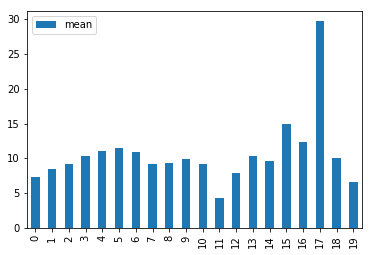

,DISTANCE_INTERVAL,mean
17,"(4240.2, 4487.8]",29.735849
15,"(3745.0, 3992.6]",14.991525
16,"(3992.6, 4240.2]",12.307692
5,"(1269.0, 1516.6]",11.526258
4,"(1021.4, 1269.0]",10.999720
6,"(1516.6, 1764.2]",10.941601
3,"(773.8, 1021.4]",10.406810
13,"(3249.8, 3497.4]",10.391892
18,"(4487.8, 4735.4]",10.039216
9,"(2259.4, 2507.0]",9.942630


In [77]:
distance_delay_sample['DISTANCE_INTERVAL']=pd.cut(distance_delay_sample['DISTANCE'], 20)
distance_avgDelay=distance_delay_sample.groupby(['DISTANCE_INTERVAL'])['DEPARTURE_DELAY'].mean().reset_index(name='mean')
distance_avgDelay.plot.bar()
plt.show()

distance_avgDelay.sort_values(by=['mean'],ascending=False).head(20)
